In [1]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
def show_images(images, titles, figsize=(12, 8)):
    plt.figure(figsize=figsize)
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        if isinstance(image, Image.Image):  # Check if the image is a PIL Image
            image = np.array(image)
        if len(image.shape) == 2:  # Check if the image is grayscale
            plt.imshow(image, cmap='gray')
        else:
            plt.imshow(image)
        plt.title(title)
        plt.axis('off')
    plt.show()

In [3]:
# Load the input image using OpenCV
image = cv2.imread("/home/vshah/Documents/Uni/Thesis_Cluster/pupil-size-estimation-with-super-resolution/data/EyeDentify/W_SR/GFPGAN_x2/left_eye/25/1/frame_01.png.png")

In [4]:
from PIL import Image
import os
import colorsys

In [5]:
def HSVColor(img):
    if isinstance(img,Image.Image):
        r,g,b = img.split()
        Hdat = []
        Sdat = []
        Vdat = [] 
        for rd,gn,bl in zip(r.getdata(),g.getdata(),b.getdata()) :
            h,s,v = colorsys.rgb_to_hsv(rd/255.,gn/255.,bl/255.)
            Hdat.append(int(h*255.))
            Sdat.append(int(s*255.))
            Vdat.append(int(v*255.))
        r.putdata(Hdat)
        g.putdata(Sdat)
        b.putdata(Vdat)
        return Image.merge('RGB',(r,g,b))
    else:
        return None

In [6]:
a = Image.open("/home/vshah/Documents/Uni/Thesis_Cluster/pupil-size-estimation-with-super-resolution/data/EyeDentify/W_SR/GFPGAN_x2/left_eye/25/1/frame_01.png.png")
b = HSVColor(a)

In [7]:
b.save(os.path.join("/home/vshah/Documents/Uni/Thesis_Cluster/pupil-size-estimation-with-super-resolution/preprocessing", 'converted_hsv_image.jpg'))

In [8]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [9]:
# Convert the image to different color spaces
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)
image_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
image_hls = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
image_ycbcr = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
luv_image = cv2.cvtColor(image, cv2.COLOR_BGR2Luv)
xyz_image = cv2.cvtColor(image, cv2.COLOR_BGR2XYZ)
equalized_image = cv2.equalizeHist(gray_image)

In [10]:
normalized_image = cv2.normalize(image_rgb, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

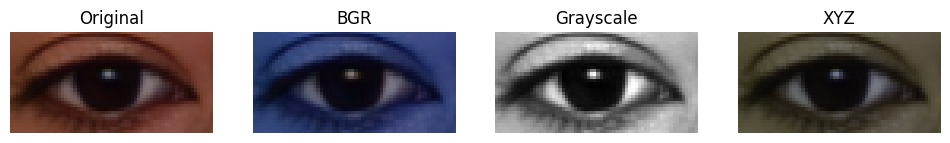

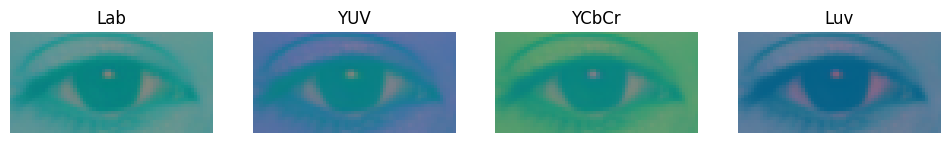

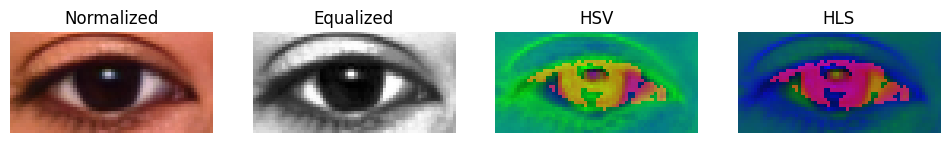

In [11]:
images = [image_rgb, image, gray_image, xyz_image]
titles = ['Original', 'BGR', 'Grayscale', 'XYZ']
show_images(images, titles)

images = [image_lab, image_yuv, image_ycbcr, luv_image]
titles = ['Lab', 'YUV', 'YCbCr', 'Luv']
show_images(images, titles)

images = [normalized_image, equalized_image, image_hsv, image_hls]
titles = ['Normalized', 'Equalized', 'HSV', 'HLS']
show_images(images, titles)

In [12]:
# Convert the image to different color spaces
gray_image = cv2.cvtColor(normalized_image, cv2.COLOR_RGB2GRAY)
image_hsv = cv2.cvtColor(normalized_image, cv2.COLOR_RGB2HSV)
image_lab = cv2.cvtColor(normalized_image, cv2.COLOR_RGB2Lab)
image_yuv = cv2.cvtColor(normalized_image, cv2.COLOR_RGB2YUV)
image_hls = cv2.cvtColor(normalized_image, cv2.COLOR_RGB2HLS)
image_ycbcr = cv2.cvtColor(normalized_image, cv2.COLOR_RGB2YCrCb)
luv_image = cv2.cvtColor(normalized_image, cv2.COLOR_RGB2Luv)
xyz_image = cv2.cvtColor(normalized_image, cv2.COLOR_RGB2XYZ)
equalized_image = cv2.equalizeHist(gray_image)

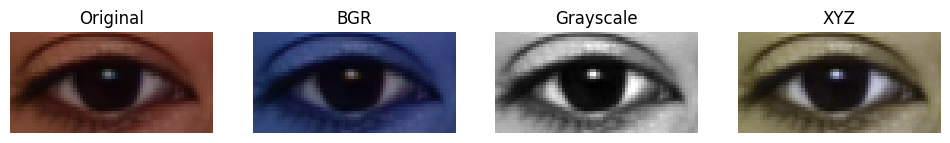

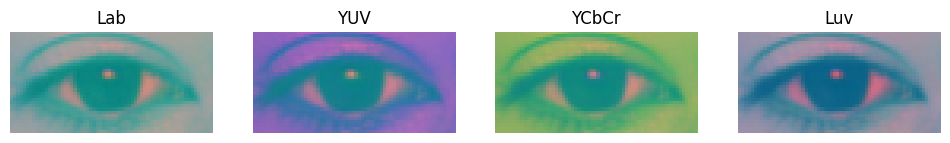

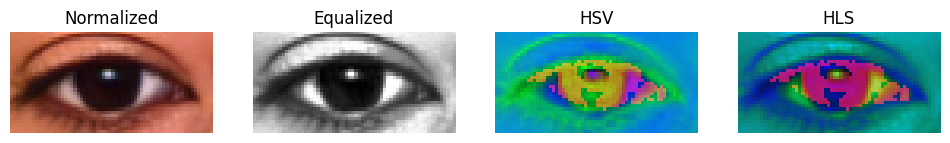

In [13]:
images = [image_rgb, image, gray_image, xyz_image]
titles = ['Original', 'BGR', 'Grayscale', 'XYZ']
show_images(images, titles)

images = [image_lab, image_yuv, image_ycbcr, luv_image]
titles = ['Lab', 'YUV', 'YCbCr', 'Luv']
show_images(images, titles)

images = [normalized_image, equalized_image, image_hsv, image_hls]
titles = ['Normalized', 'Equalized', 'HSV', 'HLS']
show_images(images, titles)

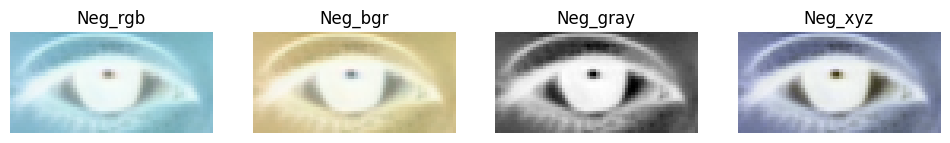

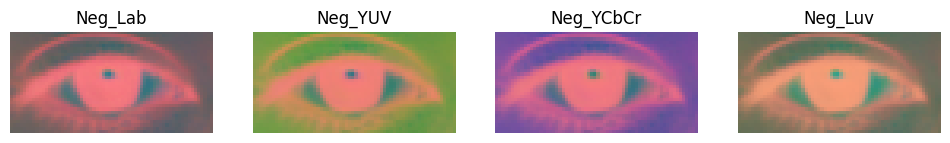

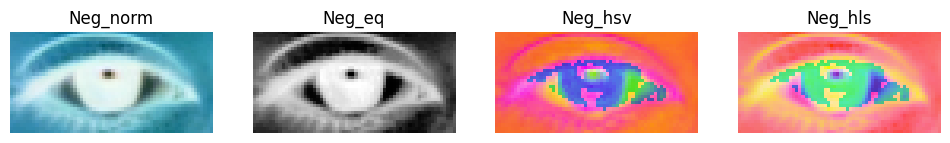

In [14]:
negative_image_rgb = 255 - image_rgb
negative_image_bgr = 255 - image
negative_gray_image = 255 - gray_image
negative_xyz_image = 255 - xyz_image

negative_image_lab = 255 - image_lab
negative_image_yuv = 255 - image_yuv
negative_image_ycbcr = 255 - image_ycbcr
negative_luv_image = 255 - luv_image

negative_image_normalized = 255 - normalized_image
negative_image_equalized = 255 - equalized_image
negative_image_hsv = 255 - image_hsv
negative_image_hls = 255 - image_hls

images = [negative_image_rgb, negative_image_bgr, negative_gray_image, negative_xyz_image]
titles = ['Neg_rgb', 'Neg_bgr', 'Neg_gray', 'Neg_xyz']
show_images(images, titles)

images = [negative_image_lab, negative_image_yuv, negative_image_ycbcr, negative_luv_image]
titles = ['Neg_Lab', 'Neg_YUV', 'Neg_YCbCr', 'Neg_Luv']
show_images(images, titles)

images = [negative_image_normalized, negative_image_equalized, negative_image_hsv, negative_image_hls]
titles = ['Neg_norm', 'Neg_eq', 'Neg_hsv', 'Neg_hls']
show_images(images, titles)